In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [3]:
data = load_digits()

In [4]:
data_x = data.data
data_y = data.target

In [5]:
data_x.shape
data_y.shape

(1797,)

0


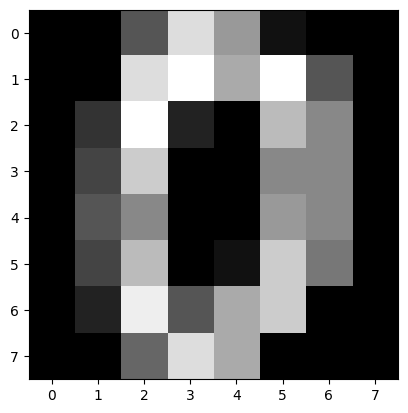

In [6]:
plt.imshow(data_x[0].reshape((-1, 8)), cmap='gray')
print(data_y[0])
plt.show()

In [7]:
data_x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [9]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [10]:
mnb.fit(data_x, data_y)
gnb.fit(data_x, data_y)

GaussianNB()

In [11]:
print(mnb.score(data_x, data_y))
print(gnb.score(data_x, data_y))

0.9053978853644964
0.8580968280467446


In [12]:
print(cross_val_score(mnb, data_x, data_y, scoring="accuracy", cv=10).mean())
print(cross_val_score(gnb, data_x, data_y, scoring="accuracy", cv=10).mean())

0.8797858472998138
0.8113904407200497


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
predY = mnb.predict(data_x)
predY

array([0, 1, 1, ..., 8, 9, 8])

In [16]:
cnfmat = confusion_matrix(data_y, predY)
cnfmat

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

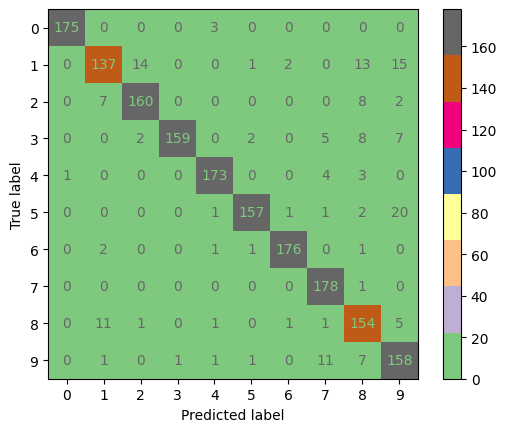

In [33]:
disp = ConfusionMatrixDisplay(cnfmat)
disp.plot(cmap=plt.cm.Accent)